# Zainab Mohammad


# Research Questions and Interest:


#### **Q.1: Do either the amount of daily music listening or age have an effect on an individual's mental health, and if so, what are the correlation patterns?**

**Sub-questions:**

**Does the choice of primary streaming service of music have a correlation with mental health?**

**Is there any correlation of the external academic factors of "Year level" and "CGPA" (cumulative GPA) with mental health?** <br><br>



I have a profound interest in how various lifestyle factors can influence an individual's health and general well-being. Thus, for this project, my group decided that observing a common lifestyle factor like music and attempting to learn how it may affect an individual's mental health would be a worthwhile idea. Particularly, I have chosen to concentrate on discovering if there is correlation of mental health to the factors: age, the amount of time an individual spends listening to music every day, and the streaming service they use. After some analysis, I decided to explore an additional dataset and became interested in my second sub-question, which connects academic factors to mental health.


#### **Analysis Plan:**


I plan on using the "Age" and "Hours per day" columns of the initial dataset (Music therapy and mental health), as well as the four mental health columns, "Anxiety", "Depression", "Insomnia", and "OCD". Hence, I will create a new, processed table that includes these six columns, with the data corresponding to these six variables. I will also keep the "Primary streaming service" column.


Next, I plan to create an "Hours per day in %" column, by expressing the values in the "Hours per day" column as a percentage, using this calculation: (value/24) * 100.


While I will be examining the effects of age and hours of music on each of the four mental health conditions, I may also produce visualizations depicting the effects on *overall mental health*. To examine mental health as a whole, I will add the values from the four mental health columns to create an additional "Overall Mental Health" column, which includes the sum of the four columns' values, out of 40. For simplicity, I'll likely further convert this new column such that it is out of 100- this will be done by mulitplying the values in the "Overall Mental Health" column by 2.5.


Since I hope to examine the effects of amount of music listened to per day on mental health, and compare that to the effects of age on mental health, I will likley create ten reshaped datasets. The columns of each dataset will be as such:
- "Hours per day in %", "Anxiety"
- "Hours per day in %", "Depression"
- "Hours per day in %", "Insomnia"
- "Hours per day in %", "OCD"
- "Hours per day in %", "Overall Mental Health"
<br>

- "Age", "Anxiety"
- "Age", "Depression"
- "Age", "Insomnia"
- "Age", "OCD"
- "Age", "Overall Mental Health"



These datasets will be used to produce respective visualizations. The details are yet to be finalized; creating some visualizations first shall allow me to further narrow down my next steps.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the initial dataset

dataset = pd.read_csv('../data/raw/music_therapy_and_mental_health_survey_results (1).csv') 

In [ ]:
# This is a bit random, but here is a code to check the file type of a dataset, let's check the file type of our dataset to ensure it is a proper Excel file:

import os
import mimetypes as mmt

filename = "music_therapy_and_mental_health_survey_results (1).csv"
filetype = mmt.guess_type(filename)[0]

if filetype is not None:
    print(f"The file type of this file is: {filetype}")
else:
    print(f"Was not able to successfully determine the file type of '{filename}'")

The file type of this file is: application/vnd.ms-excel


In [ ]:
# Yes, it is an Excel file! Next, before starting, let's count the total number of rows and columns to see how much data there is

dataset.shape

(736, 33)

In [ ]:
# I want to delete certain columns hence I will print out column list, to see all column names

dataset.columns.values

# After this, I can begin creating a function load and process all the data I need from the "dataset" column next; 
# This function is in the "scripts" directory
# The "load_and_process" function includes code such that it loads data, drops specified columns, drops rows with missing values, then applies the Primarystreamingservice function to make a new column, converts numbers in that column to float type, creates a new column that gives hours/day in %, and a new column that gives the overall mental health out of 100, and lastly, it orders all columns in the order specified:
# The "Primarystreamingservice" function will be made to convert all strings to numbers in the primary streaming service column (since all values in this column are strings, and it might be easier to work with numbers when making visualizations)

array(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]',
       'Frequency [Video game music]', 'Anxiety', 'Depression',
       'Insomnia', 'OCD', 'Music effects', 'Permissions'], dtype=object)

# EDA for Q.1

In [ ]:
# I'll use the "load_and_process" function I created via method chaining to load in the prepared dataset:  

import scripts
from scripts import project_functions_Zainab as pt 

datasetchain2 = pt.load_and_process('../data/raw/music_therapy_and_mental_health_survey_results (1).csv')
datasetchain2

,Age,Primary streaming service,Primary_streaming_service_in_numbers,Hours_per_day_percentage,Anxiety,Depression,Insomnia,OCD,Overall_Mental_Health_out_of_100
0,18.0,Spotify,1,12.500000,3.0,0.0,1.0,0.0,10.0
1,63.0,Pandora,2,6.250000,7.0,2.0,2.0,1.0,30.0
2,18.0,Spotify,1,16.666667,7.0,7.0,10.0,2.0,65.0
3,61.0,YouTube Music,3,10.416667,9.0,7.0,3.0,3.0,55.0
4,18.0,Spotify,1,16.666667,7.0,2.0,5.0,9.0,57.5
...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,1,8.333333,7.0,6.0,0.0,9.0,55.0
732,18.0,Spotify,1,4.166667,3.0,2.0,2.0,5.0,30.0
733,19.0,Other streaming service,6,25.000000,2.0,2.0,2.0,2.0,20.0
734,19.0,Spotify,1,20.833333,2.0,3.0,2.0,1.0,20.0


In [ ]:
# Saving the above processed dataset to the processed data directory:

datasetchain2.to_csv('../data/processed/analysisZainabdataset1.csv', index=False)

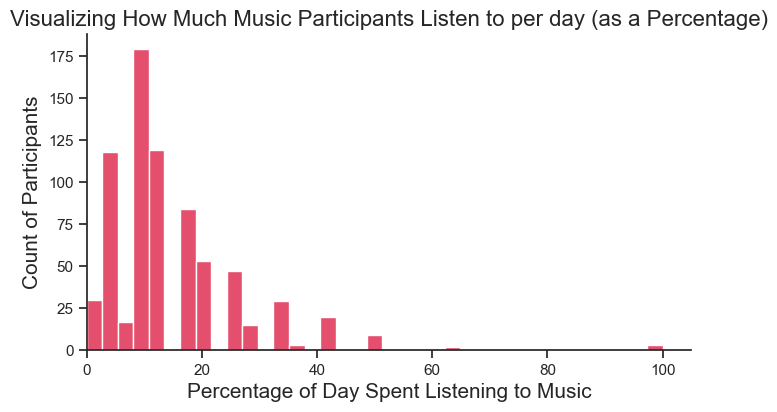

In [ ]:
# Let's visualize the "Hours_per_day_percentage" column to see the spread of how much music the participants of this survey listen to per day:

sns.set_theme(style="ticks")
plot1=sns.displot(data=datasetchain2, x="Hours_per_day_percentage", color="crimson", height=4, aspect=1.75)
plot1.set_xlabels('Percentage of Day Spent Listening to Music', fontsize=15)
plot1.set_ylabels('Count of Participants', fontsize=15)
plot1.ax.set_title('Visualizing How Much Music Participants Listen to per day (as a Percentage)', fontsize=16)
plot1.facet_axis(0, 0).set_xlim(0, None)
plot1.facet_axis(0, 0).set_ylim(0, None)

#exporting the plot to images folder:
plot1.savefig('../images/analysisEDA3graph1.png', bbox_inches="tight")


The figure above plots the percentage of day spent listening to music, and sees how many participants listen to music for how long. The mode value is at around 10% of the day, and overall, it can be seen that most people listen to music for only ~0-40% of their day.

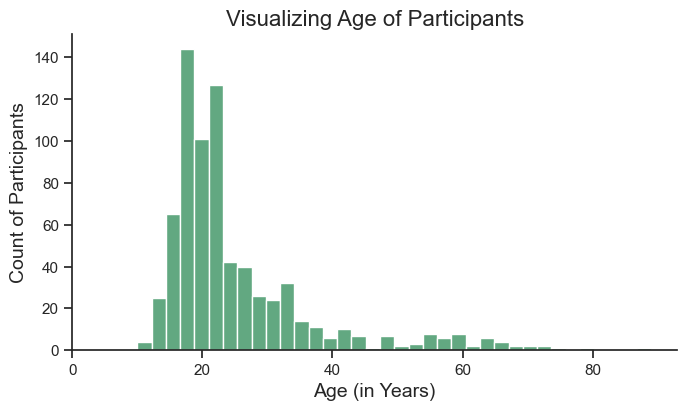

In [ ]:
# Let's visualize the "Age" column to see the spread of how much music the participants of this survey listen to per day

sns.set_theme(style="ticks")
plot2=sns.displot(data=datasetchain2, x="Age", color="seagreen", height=4, aspect=1.75)
plot2.set_xlabels('Age (in Years)', fontsize=14)
plot2.set_ylabels('Count of Participants', fontsize=14)
plot2.ax.set_title('Visualizing Age of Participants', fontsize=16)
plot2.facet_axis(0, 0).set_xlim(0, None)
plot2.facet_axis(0, 0).set_ylim(0, None)

#exporting the plot to images folder:
plot2.savefig('../images/analysisEDA3graph2.png', bbox_inches="tight")


The figure above plots the age of participants (in years) against count, which provides the spread of the age of the participants in the survey. Overall, it can be seen that most participants were aged around 20, although the total range spans from around 10 to over 80.

In [ ]:
# Let's check for outliers for the Age and the Overall_Mental_Health_out_of_100 columns, via the describe() function: 

datasetchain2.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Age,734.0,25.212534,12.062188,10.0,18.000000,21.0,28.000000,89.0
Hours_per_day_percentage,734.0,14.881642,12.632479,0.0,8.333333,12.5,20.833333,100.0
Anxiety,734.0,5.829019,2.791967,0.0,4.000000,6.0,8.000000,10.0
Depression,734.0,4.794278,3.029963,0.0,2.000000,5.0,7.000000,10.0
Insomnia,734.0,3.733651,3.086117,0.0,1.000000,3.0,6.000000,10.0
OCD,734.0,2.625341,2.836728,0.0,0.000000,2.0,4.000000,10.0
Overall_Mental_Health_out_of_100,734.0,42.455722,20.652155,0.0,27.500000,42.5,57.500000,97.5


There are a few **outliers** for the Hours_per_day_percentage column, as seen by the max value of this column being 100. This mean that some individuals claim they listen to music for 100% of their day. This is quite high but perhaps these individuals have music playing 24/7, even during sleep? The minimum value is 0, but this is not abnormal either, as some people do not listen to music. I will choose to keep all datapoints then, just to see if any interesting trends are observed. 

All the age values look appropriate; the max value is 89 and the min value is 10, suggesing there were some much older and some much younger participants, but I will not delete these outliers. The data those populations provide is valuable, and I am interested to see how age and overall mental health correlate, so the larger the age range is, the better!  

Also, mental health rankings are subjective, so I have **chosen to not delete any outliers at all**.

In [ ]:
# Now, I  can start generating multiple tables to aid with visualizations 

df1 = datasetchain2[["Hours_per_day_percentage", "Anxiety"]]

In [ ]:
df2 = datasetchain2[["Hours_per_day_percentage", "Depression"]]

In [ ]:
df3 = datasetchain2[["Hours_per_day_percentage", "Insomnia"]]

In [ ]:
df4 = datasetchain2[["Hours_per_day_percentage", "OCD"]] 

In [ ]:
df5 = datasetchain2[["Hours_per_day_percentage", "Overall_Mental_Health_out_of_100"]]

In [ ]:
df6 = datasetchain2[["Age", "Anxiety"]]

In [ ]:
df7 = datasetchain2[["Age", "Depression"]]

In [ ]:
df8 = datasetchain2[["Age", "Insomnia"]]

In [ ]:
df9 = datasetchain2[["Age", "OCD"]]

In [ ]:
df10 = datasetchain2[["Age", "Overall_Mental_Health_out_of_100"]]

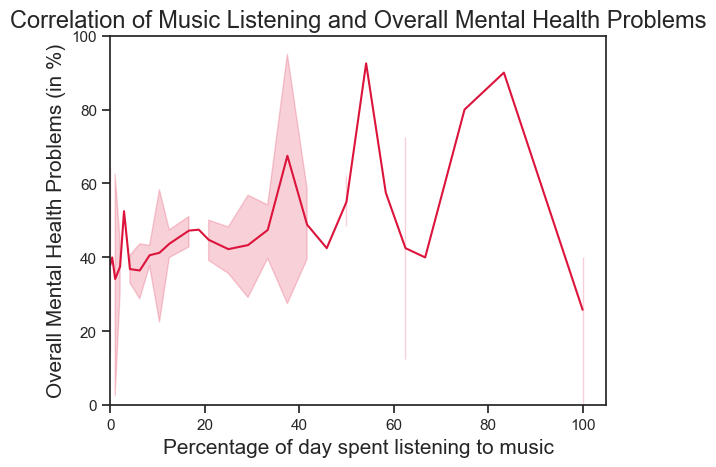

In [ ]:
# Now that all 10 graphs are made, let's make visualizations from graph 5 and graph 10, to visualize the correlation between their respective columns:

sns.set_theme(style="ticks")
plot3=sns.lineplot(data=df5, x="Hours_per_day_percentage", y="Overall_Mental_Health_out_of_100", color='crimson')
plot3.set_xlabel("Percentage of day spent listening to music", fontsize=15)
plot3.set_ylabel("Overall Mental Health Problems (in %)", fontsize=15)
plot3.set_title("Correlation of Music Listening and Overall Mental Health Problems", fontsize=17) 
plot3.set_xlim(0, None)
plot3.set_ylim(0, 100)

#exporting the plot to images folder:
plt.savefig('../images/analysisEDA3graph3.png', bbox_inches="tight")


Plot 3 utilized a lineplot to roughly visualize how the amount of music listening correlates to overall mental health problems. The plot seems to show that listening to more music and increased mental health problems have a positive correlation, although a lot of higher x-axis datapoints show a sharp decrease in mental health problems. Overall, since this graph shows many ups and downs, perhaps plotting individual plots for each of the four mental health conditions may be a better idea.


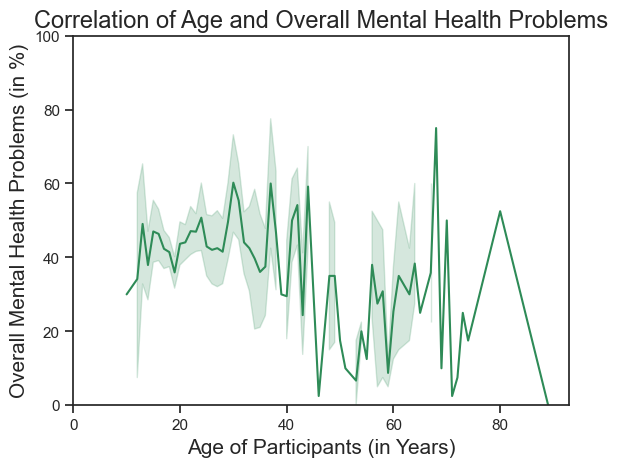

In [ ]:
sns.set_theme(style="ticks")
plot4=sns.lineplot(data=df10, x="Age", y="Overall_Mental_Health_out_of_100", color='seagreen')
plot4.set_xlabel("Age of Participants (in Years)", fontsize=15)
plot4.set_ylabel("Overall Mental Health Problems (in %)", fontsize=15)
plot4.set_title("Correlation of Age and Overall Mental Health Problems", fontsize=17) 
plot4.set_xlim(0, None)
plot4.set_ylim(0, 100)

#exporting the plot to images folder:
plt.savefig('../images/analysisEDA3graph4.png', bbox_inches="tight")


Plot 4 utilized a lineplot to roughly visualize how age correlates to overall mental health problems. The plot showed an overall decline in overall mental health problems at older ages, suggesting a possible negative correlation between the two variables, however once again there are a lot of ups and downs. Overall, applying more complex visualizations/features like trendlines to this graph to better illustrate the negative correlation may be helpful.

Perhaps for the next steps, I will use a jointplot/histplot for better illustrations. 
Also, since I now realize that analyzing mental health as a whole using the "Overall Mental Health" column may not be very transparent, for my next steps I am planning to visualize each mental health column (Anxiety, Depression, Insomnia, and OCD) with age and with amount of music listened to. As for creation of new columns or more data aggregation, I don't feel that is further needed at this point. I also have made the individual datasets so those should be sufficient tools for now.

Let's make a more complex visualization to compare percentage of day spent listening to music and overall mental health. I will use histplots: 

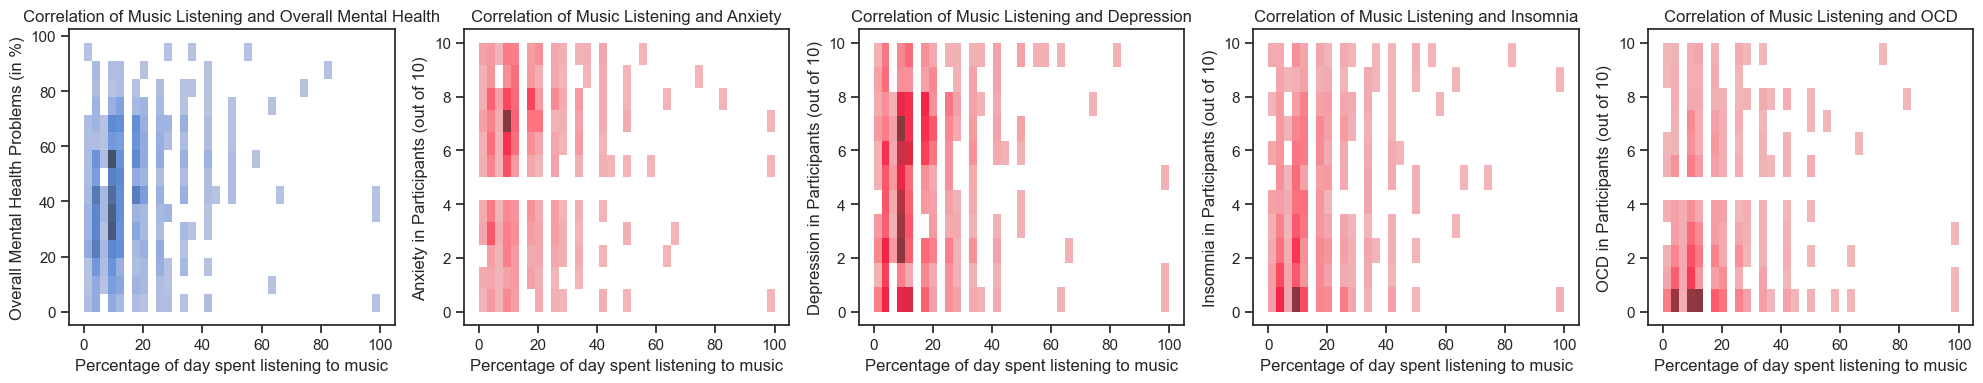

In [ ]:
fig, axs = plt.subplots(ncols=5, figsize=(20, 4))

sns.histplot(data=df5, x="Hours_per_day_percentage", y="Overall_Mental_Health_out_of_100", kde=True, ax=axs[0])
axs[0].set_xlabel('Percentage of day spent listening to music')
axs[0].set_ylabel('Overall Mental Health Problems (in %)')
axs[0].set_title('Correlation of Music Listening and Overall Mental Health')

sns.histplot(data=df1, x="Hours_per_day_percentage", y="Anxiety", kde=True, color='crimson', ax=axs[1])
axs[1].set_xlabel('Percentage of day spent listening to music')
axs[1].set_ylabel('Anxiety in Participants (out of 10)')
axs[1].set_title('Correlation of Music Listening and Anxiety')

sns.histplot(data=df2, x="Hours_per_day_percentage", y="Depression", kde=True, color='crimson', ax=axs[2])
axs[2].set_xlabel('Percentage of day spent listening to music')
axs[2].set_ylabel('Depression in Participants (out of 10)')
axs[2].set_title('Correlation of Music Listening and Depression')

sns.histplot(data=df3, x="Hours_per_day_percentage", y="Insomnia", kde=True, color='crimson', ax=axs[3])
axs[3].set_xlabel('Percentage of day spent listening to music')
axs[3].set_ylabel('Insomnia in Participants (out of 10)')
axs[3].set_title('Correlation of Music Listening and Insomnia')

sns.histplot(data=df4, x="Hours_per_day_percentage", y="OCD", kde=True, color='crimson', ax=axs[4])
axs[4].set_xlabel('Percentage of day spent listening to music')
axs[4].set_ylabel('OCD in Participants (out of 10)')
axs[4].set_title('Correlation of Music Listening and OCD')

fig.tight_layout()

#exporting the plot to images folder:
plt.savefig('../images/analysis3graph2.png', bbox_inches="tight")

#showing the plot:
plt.show()


The five histplots above relate the **percentage of day spent spent listening to music to overall mental health problems, anxiety, depression, insomnia, and OCD**, respectively. <br><br>
The first one shows that individuals listening to less music in a day have their overall mental health problems fall at around the middle (~ 50%), and as the amount of listening in a day increases, there is a possible **increase** in overall mental health problems (indicated by more datapoints in the upper region for x>60 datapoints). <br> <br>
The second plot shows that individuals listening to less music in a day have their anxiety levels at around the upper-middle region (~ 6-7/10), and as the amount of listening in a day increases, there is a possible increase in anxiety problems (indicated by more datapoints in the upper region for x>60 datapoints). <br><br>
The third plot shows that individuals listening to less music in a day have their depression levels at around the middle region (~ 4/10), and as the amount of listening in a day increases, there is a possible increase in depression problems (indicated by more datapoints in the upper region for x>65 datapoints). <br><br>
The fourth plot shows that individuals listening to less music in a day have their insomnia levels at the lower region (~ 1/10), and as the amount of listening in a day increases, there is a clear increase in insomnia problems (indicated by more datapoints in the upper region for x>55 datapoints). <br><br>
The final plot shows that individuals listening to less music in a day have their OCD levels at the low region (~ 1/10), and as the amount of listening in a day increases, there is an increase in OCD problems for populations listening to music for more than 65% of their day.


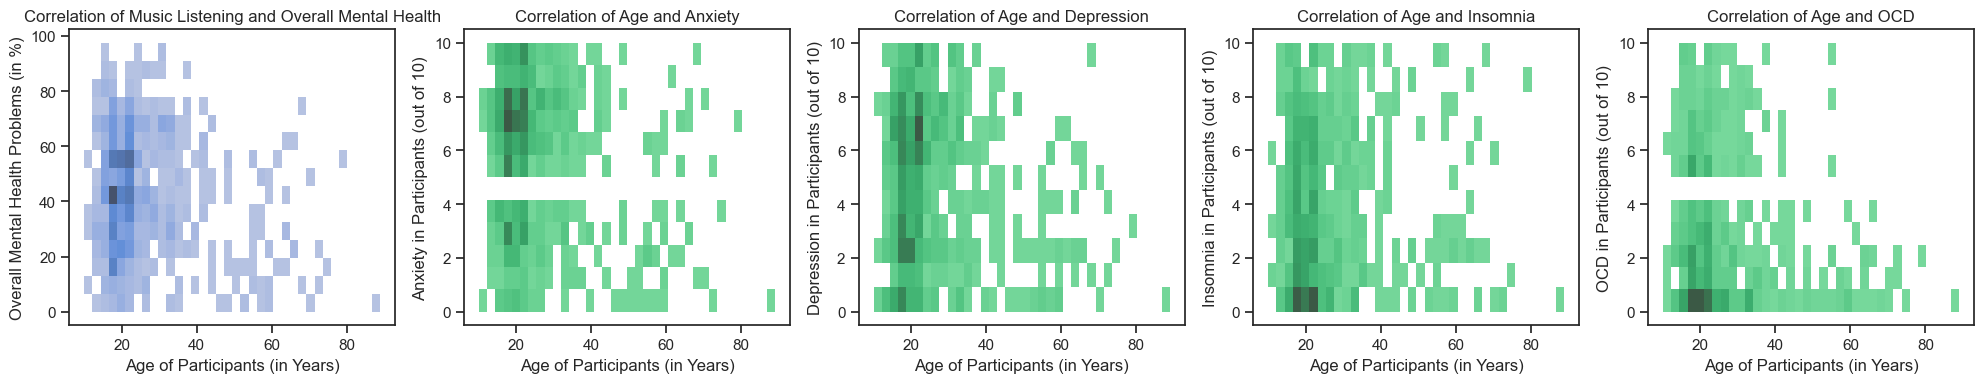

In [ ]:
import matplotlib.pyplot as plt

fig, axs2 = plt.subplots(ncols=5, figsize=(20, 4))

# Plot the first jointplot on the first subplot
sns.histplot(data=df10, x="Age", y="Overall_Mental_Health_out_of_100", kde=True, ax=axs2[0])
axs2[0].set_xlabel('Age of Participants (in Years)')
axs2[0].set_ylabel('Overall Mental Health Problems (in %)')
axs2[0].set_title('Correlation of Music Listening and Overall Mental Health')

sns.histplot(data=df6, x="Age", y="Anxiety", kde=True, color='seagreen', ax=axs2[1])
axs2[1].set_xlabel('Age of Participants (in Years)')
axs2[1].set_ylabel('Anxiety in Participants (out of 10)')
axs2[1].set_title('Correlation of Age and Anxiety')

sns.histplot(data=df7, x="Age", y="Depression", kde=True, color='seagreen', ax=axs2[2])
axs2[2].set_xlabel('Age of Participants (in Years)')
axs2[2].set_ylabel('Depression in Participants (out of 10)')
axs2[2].set_title('Correlation of Age and Depression')

sns.histplot(data=df8, x="Age", y="Insomnia", kde=True, color='seagreen', ax=axs2[3])
axs2[3].set_xlabel('Age of Participants (in Years)')
axs2[3].set_ylabel('Insomnia in Participants (out of 10)')
axs2[3].set_title('Correlation of Age and Insomnia')

sns.histplot(data=df9, x="Age", y="OCD", kde=True, color='seagreen', ax=axs2[4])
axs2[4].set_xlabel('Age of Participants (in Years)')
axs2[4].set_ylabel('OCD in Participants (out of 10)')
axs2[4].set_title('Correlation of Age and OCD')

fig.tight_layout()

#exporting the plot to images folder:
plt.savefig('../images/analysis3graph3.png', bbox_inches="tight")

#showing the plot:
plt.show()

The five histplots above relate **age to overall mental health problems, anxiety, depression, insomnia, and OCD**, respectively. <br><br>
The first one shows that younger individuals have their overall mental health problems fall at around the middle (~ 50%), and as age increases, there is a **decrease** in overall mental health problems (indicated by more datapoints in the lower region for x>45 datapoints). <br> <br>
The second plot shows that younger individuals have their anxiety levels at around the upper-middle region (~ 7/10), and as age increases, there is a possible decrease in anxiety problems (indicated by more datapoints in the lower region for x= 45-60 and x>80 datapoints). <br><br>
The third plot shows that younger individuals have their depression levels at around the upper-middle region (~ 7/10), and as age increases, there is a clear decrease in depression problems (indicated by more datapoints in the lower region for x>45 datapoints). <br><br>
The fourth plot shows that younger individuals have their insomnia levels at the lower region (~ 1/10), and as age increases, there is not a very clearly-distinguishable change. <br><br>
The final plot shows that younger individuals have their OCD levels at the low region (~ 1/10), and as age increases, there is an overall decrease in OCD problems (indicated by more datapoints in the lower region for x>55 datapoints).



### Last figure and final answer to Q.1:
<br>
With these new figures, there are some general trends seens; the amount of music listening in a day seems to have a positive correlation with overall mental health, and age seems to have a negative correlation with overall mental health. Having trendlines would allow for further conclusions on which mental health conditions specifically have the strongest correlation patterns. This will be done on Tableau:

<img src ="../images/analysis3graph1.png" class="center">
<br>


As visualized in the Tableau figure above, there are two lineplots. The one on the left plots the average ranking of the four mental health conditions against the percentage of day spent listening to music. For all four conditions, a positive correlation is seen, which supports our earlier conclusion. This positive correlation can be identified due to the plotted trendlines (dashed gray lines), which increase in the upwards direction for all four of the subplots. The steeper trendlines are for **depression, insomnia, and OCD, suggesting that these three mental health conditions have a stronger positive correlation to amount of music listening than anxiety does**. <br><br>
Next, the lineplot on the right plots average ranking of the four mental health conditions against age. For all four conditions, the respective trendlines go in the downwards direction as age increases, which suggests a negative correlation between average mental health problems and age, and supports the conlusion from the earlier histplots. The steeper trendlines are for **anxiety, depression, and OCD, suggesting that these three mental health conditions have a stronger negative correlation to age than insomnia does**.  

Since younger populations experience more mental health problems, I am planning to explore an additional dataset which attempts to find explain factors that may correlate to worsened mental health. 

### Sub-question 1: 
**Does the choice of primary streaming service of music have a correlation with mental health?**
<br>

After discovering the correlation of music listening and mental health conditions, I want to explore another aspect of music. I will examine if the music streaming service that an individual chooses to use also has an effect on the four different mental health conditions or not. I have chosen to evaluate the mode values of the rankings since this will indicate what the most common ranking for a mental health condition was for different primary streaming service users. For this purpose, heatmaps seem logical, so I will plot these ahead:
<br>

C:\Users\12508\AppData\Local\Temp\ipykernel_12888\1752619351.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot1 = counts1.pivot('Primary_streaming_service_in_numbers', 'Anxiety', 'count')
C:\Users\12508\AppData\Local\Temp\ipykernel_12888\1752619351.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot2 = counts2.pivot('Primary_streaming_service_in_numbers', 'Depression', 'count')
C:\Users\12508\AppData\Local\Temp\ipykernel_12888\1752619351.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot3 = counts3.pivot('Primary_streaming_service_in_numbers', 'Insomnia', 'count')
C:\Users\12508\AppData\Local\Temp\ipykernel_12888\1752619351.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot4 = counts4.pivot('Primary_streaming_service_in_numbers', 'OCD', 

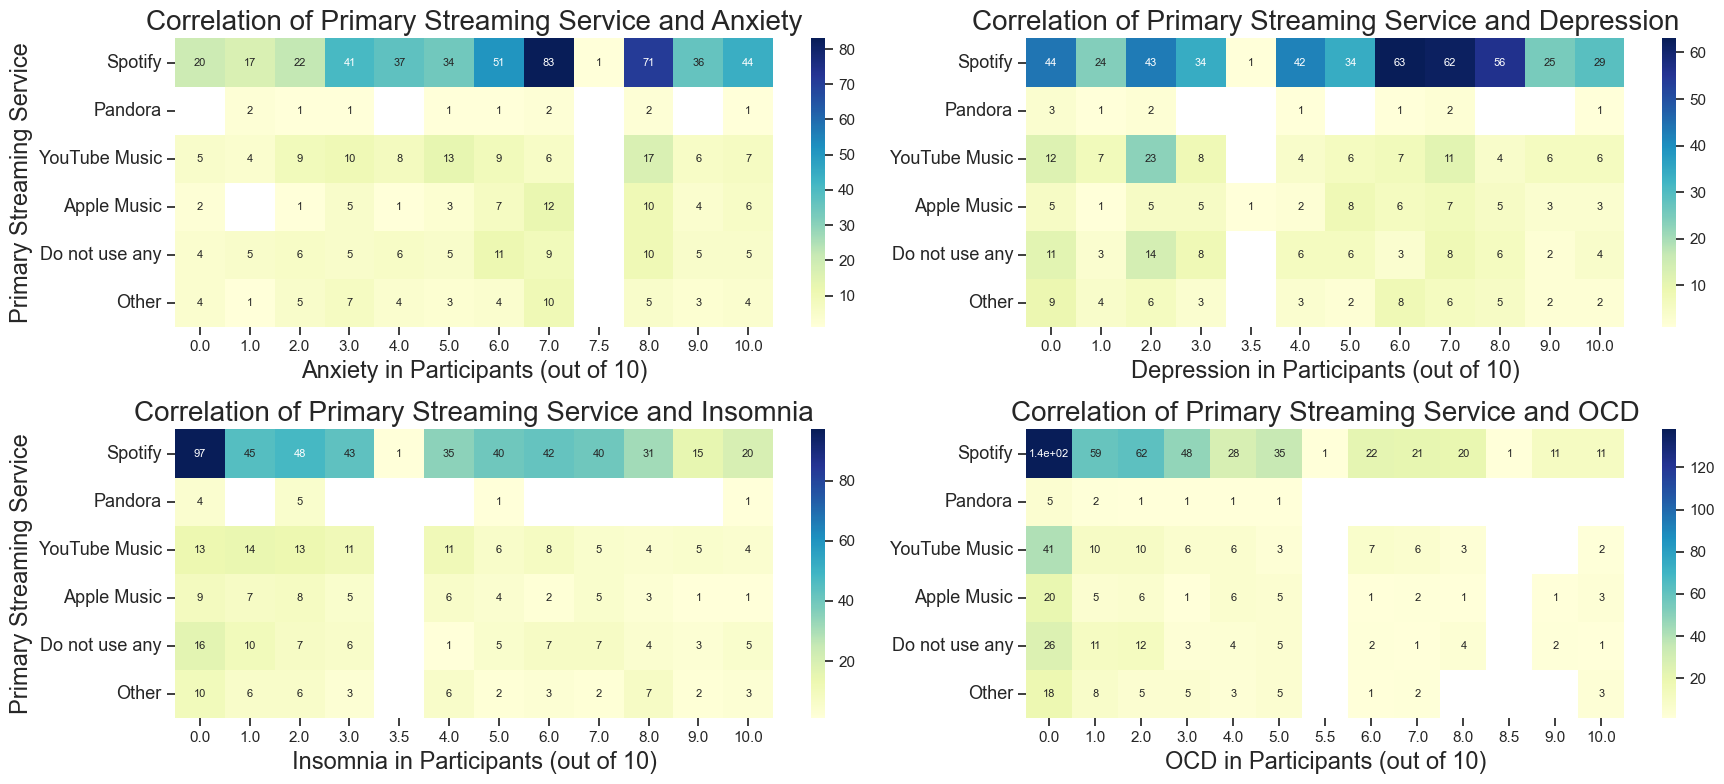

In [ ]:
counts1 = datasetchain2.groupby(['Primary_streaming_service_in_numbers', 'Anxiety']).size().reset_index(name='count')
pivot1 = counts1.pivot('Primary_streaming_service_in_numbers', 'Anxiety', 'count')

counts2 = datasetchain2.groupby(['Primary_streaming_service_in_numbers', 'Depression']).size().reset_index(name='count')
pivot2 = counts2.pivot('Primary_streaming_service_in_numbers', 'Depression', 'count')

counts3 = datasetchain2.groupby(['Primary_streaming_service_in_numbers', 'Insomnia']).size().reset_index(name='count')
pivot3 = counts3.pivot('Primary_streaming_service_in_numbers', 'Insomnia', 'count')

counts4 = datasetchain2.groupby(['Primary_streaming_service_in_numbers', 'OCD']).size().reset_index(name='count')
pivot4 = counts4.pivot('Primary_streaming_service_in_numbers', 'OCD', 'count')

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 8))

# creating a list that contains the names of the new y-axis tick mark labels
new_y_tick_labels = ['Spotify', 'Pandora', 'YouTube Music', 'Apple Music', 'Do not use any', 'Other']

heatmap1 = sns.heatmap(pivot1, annot=True, cmap='YlGnBu', ax=axs[0,0], annot_kws={"fontsize":8})
heatmap1.set_xticklabels(heatmap1.get_xticklabels(), rotation=0)
heatmap1.set_yticklabels(new_y_tick_labels, rotation=0, fontsize=13)  # setting the y-axis tick mark labels and increase font size
axs[0,0].set_xlabel('Anxiety in Participants (out of 10)', fontsize=17)  # increasing x label font size
axs[0,0].set_ylabel('Primary Streaming Service', fontsize=17)  # increase y labelling font size
axs[0,0].set_title('Correlation of Primary Streaming Service and Anxiety', fontsize=20)  # increasing title font size

heatmap2 = sns.heatmap(pivot2, annot=True, cmap='YlGnBu', ax=axs[0,1], annot_kws={"fontsize":8})
heatmap2.set_xticklabels(heatmap2.get_xticklabels(), rotation=0)
heatmap2.set_yticklabels(new_y_tick_labels, rotation=0, fontsize=13) 
axs[0,1].set_xlabel('Depression in Participants (out of 10)', fontsize=17)
axs[0,1].set_ylabel('', fontsize=17)  
axs[0,1].set_title('Correlation of Primary Streaming Service and Depression', fontsize=20)  

heatmap3 = sns.heatmap(pivot3, annot=True, cmap='YlGnBu', ax=axs[1,0], annot_kws={"fontsize":8})
heatmap3.set_xticklabels(heatmap3.get_xticklabels(), rotation=0)
heatmap3.set_yticklabels(new_y_tick_labels, rotation=0, fontsize=13)  
axs[1,0].set_xlabel('Insomnia in Participants (out of 10)', fontsize=17) 
axs[1,0].set_ylabel('Primary Streaming Service', fontsize=17)
axs[1,0].set_title('Correlation of Primary Streaming Service and Insomnia', fontsize=20)

heatmap4 = sns.heatmap(pivot4, annot=True, cmap='YlGnBu', ax=axs[1,1], annot_kws={"fontsize":8})
heatmap4.set_xticklabels(heatmap4.get_xticklabels(), rotation=0)
heatmap4.set_yticklabels(new_y_tick_labels, rotation=0, fontsize=13)   
axs[1,1].set_xlabel('OCD in Participants (out of 10)', fontsize=17)
axs[1,1].set_ylabel('', fontsize=17)
axs[1,1].set_title('Correlation of Primary Streaming Service and OCD', fontsize=20)

fig.tight_layout()

#exporting the plot to images folder:
plt.savefig('../images/analysis3graph4.png', bbox_inches="tight")

#showing the plot:
plt.show()


Four heatmaps have been plotted, one for each of the four mental health conditions (anxiety, depression, insomnia, and OCD). Scales are provided for each heatmap, to their right.

The heatmap at the top left is for anxiety, and it showed the mode rating of anxiety to be around 7 (either 6, 7, or 8) for all the various streaming service users. The heatmap on the bottom left is for insomnia, and it showed the mode rating of insomnia to be around 1 (either 0, 1, or 2) for all the various streaming service users. The heatmap on the bottom right is for OCD, and it showed the mode rating of OCD to be 0 for all the various streaming service users. These three heatmaps all indicate the same results, that **the mental health conditions anxiety, insomnia, and OCD do not have a strong correlation to the choice of streaming service.** 
<br>

The notable heatmap is the top right one, which is for depression. The mode value of rated depression was a 6 by Spotify users, a 0 by Pandora users, a 2 by YouTube Music users, a 5 by Apple Music users, a 2 by users not using any streaming service, and 0 and 6 (bimodal) by users using other streaming services. Most of the mode values were on the lower end of the range, but both Spotify users and Apple Music users had relatively higher mode values, indicating that **Spotify and Apple Music users tend to have higher depression levels than all other music listeners**. Also, Pandora had the lowest mode value of 0, suggesting **Pandora users experience the least amount of depression.** 

To support the conclusion I just came to, I will plot the average ranking of depression by each of the different primary streaming service groups and compare:

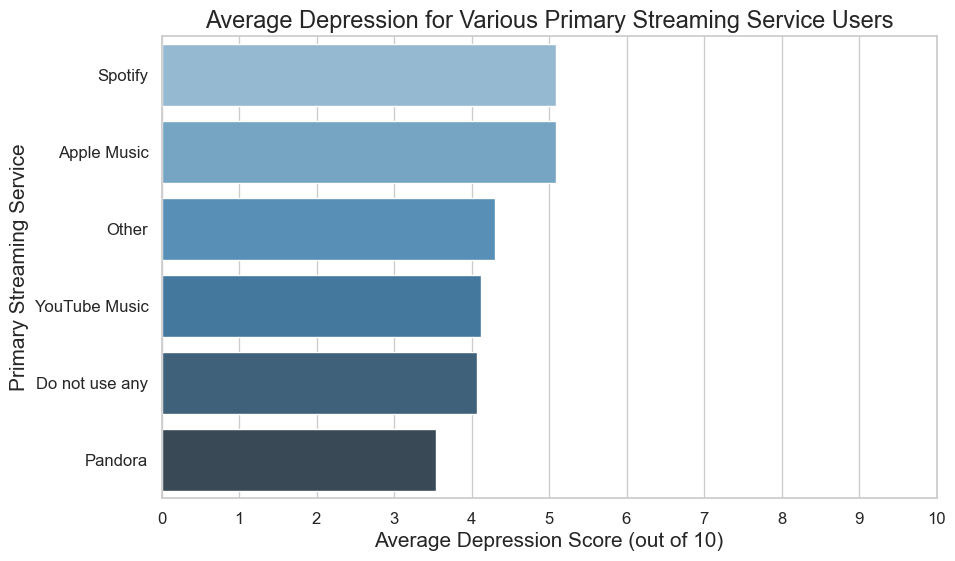

In [ ]:
# I'm grouping the data by primary streaming service and calculating the average depression rating for each group:

avg_depression = datasetchain2.groupby('Primary streaming service')['Depression'].mean().reset_index()
avg_depression = avg_depression.sort_values(by='Depression', ascending=False)
avg_depression['Primary streaming service'] = avg_depression['Primary streaming service'].replace({'Spotify': 'Spotify', 
                                                                                                     'Apple Music': 'Apple Music',
                                                                                                     'YouTube Music': 'YouTube Music',
                                                                                                     'Pandora': 'Pandora',
                                                                                                     'I do not use a streaming service.': 'Do not use any',
                                                                                                     'Other streaming service': 'Other'})
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x="Depression", y="Primary streaming service", data=avg_depression, palette="Blues_d")

ax.set_xlabel('Average Depression Score (out of 10)', fontsize=15)
ax.set_ylabel('Primary Streaming Service', fontsize=15)
ax.set_title('Average Depression for Various Primary Streaming Service Users', fontsize=17)
ax.tick_params(labelsize=12)
ax.set_xlim([0, 10])
plt.xticks(range(0, 11, 1))

#exporting the plot to images folder:
plt.savefig('../images/analysis3graph5.png', bbox_inches="tight")

#showing the plot:
plt.show() 

The "Average Depression for Various Primary Streaming Service Users" barplot was created to prove the findings concluded from Figure 2. The barplot has the average values of the various streaming service options plotted against the rating of depression (on a scale out of 10), and indeed, it can be seen that **Spotify and Apple Music users both have relatively higher average depression scores of over 5, whereas all other averages are around 4 or less. Pandora clearly has the lowest average, indicating that Pandora users are indeed the least depressed**.

## EDA for new dataset: Student mental health

In [ ]:
# I have added a new short dataset because I am curious to see how mental health varies in students
# Let's explore the dataset's columns first, by loading dataset:

df = pd.read_csv('../data/raw/Student_mental_health.csv')
df

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


I will only work with five of the columns (What is your CGPA?, Your current year of Study, Do you have Anxiety?, Do you have Panic attack?, Age), since those are the most interesting and relevant. I excluded the mental health condition of panic attacks simply since our initial dataset did not include that.


In [ ]:
# Let's check how many unique values there are for each of the five columns in df:

df['What is your CGPA?'].unique() 

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

Since the unique values above contain the range 3.50-4.00 twice (one has an extra space), I'll need to deal with this using the strip() function, which ignores whitespace.

In [ ]:
df['Your current year of Study'].unique() 

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

The unique values above have been differentiated based on upper and lower cases, but I don't want that since to me, year 1 is the same as Year 1. I plan to use the lower() function to deal with this. 

In [ ]:
df['Age'].unique() 

array([18., 21., 19., 22., 23., 20., 24., nan])

In [ ]:
# Now checking unique values of the depression and anxiety columns:
df['Do you have Depression?'].unique()  

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Do you have Anxiety?'].unique() 

array(['No', 'Yes'], dtype=object)

In [ ]:
# Great, nothing needs to be changed for the previous two columns, however in my plots, I will remember to reorder the anxiety column so that the 'Yes' comes before 'No' 

# Now it's time for the processing! I've made a function which loads data, drops specified columns, drops any rows with missing values, applies the lower() function so that there is no differentiation between upper and lower characters (this was needed), and finally, applies the strip() function to ignore whitespaces in responses (this was need since some participants typed extra spaces), and returns "dataset_smh", 

import scripts
from scripts import project_functions_Zainab as pt 

dataset_smh = pt.load_datasetsmh('../data/raw/Student_mental_health.csv') 
dataset_smh

,Age,Your current year of Study,What is your CGPA?,Do you have Depression?,Do you have Anxiety?
0,18.0,year 1,3.00 - 3.49,Yes,No
1,21.0,year 2,3.00 - 3.49,No,Yes
2,19.0,year 1,3.00 - 3.49,Yes,Yes
3,22.0,year 3,3.00 - 3.49,Yes,No
4,23.0,year 4,3.00 - 3.49,No,No
...,...,...,...,...,...
96,21.0,year 1,3.50 - 4.00,No,Yes
97,18.0,year 2,3.00 - 3.49,Yes,Yes
98,19.0,year 3,3.50 - 4.00,Yes,No
99,23.0,year 4,3.50 - 4.00,No,No


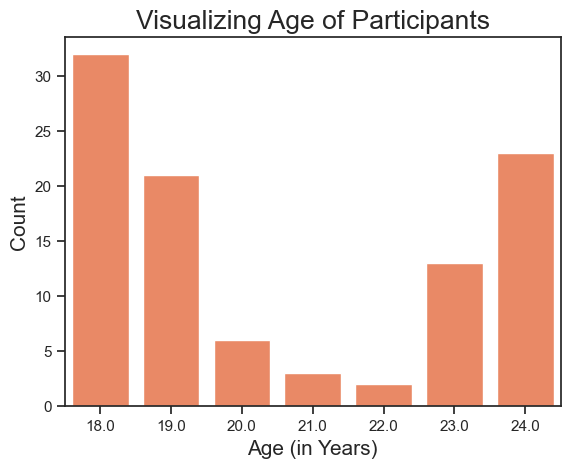

In [ ]:
# I want to visualize the spread of age of the participants in the study:

sns.set(style='ticks')
plot5=sns.countplot(x='Age', data=dataset_smh, color='coral')
plot5.set_title('Visualizing Age of Participants', fontsize=19)
plot5.set_xlabel('Age (in Years)', fontsize=15)
plot5.set_ylabel('Count', fontsize=15)

#exporting the plot to images folder:
plt.savefig('../images/analysisEDA3graph5.png', bbox_inches="tight")

plt.show()

The countplot above shows the count of how many participants in different ages participated in the study. It can be seen that the mode value (highest value) is 18, and the next two highest count values are of 19 and 24 year olds (both have similar counts). The other three ages were 20, 21, and 22 year olds, but their participation was lower. The range is only from 18-24, so overall, since all participants are younger individuals, I think this dataset will be appropriate to study the effects of academics on "younger individuals".

In [ ]:
# I've decided I want to stack the anxiety and depression columns into a single column via the melt() function, so that I have one column called "Mental Health Problem" to which the answer is either yes or no:

melted_dataset_smh = pd.melt(dataset_smh, id_vars=['What is your CGPA?', 'Your current year of Study'], value_vars=['Do you have Anxiety?', 'Do you have Depression?'], var_name='Question', value_name='Mental Health Problem:') 
melted_dataset_smh

,What is your CGPA?,Your current year of Study,Question,Mental Health Problem:
0,3.00 - 3.49,year 1,Do you have Anxiety?,No
1,3.00 - 3.49,year 2,Do you have Anxiety?,Yes
2,3.00 - 3.49,year 1,Do you have Anxiety?,Yes
3,3.00 - 3.49,year 3,Do you have Anxiety?,No
4,3.00 - 3.49,year 4,Do you have Anxiety?,No
...,...,...,...,...
195,3.50 - 4.00,year 1,Do you have Depression?,No
196,3.00 - 3.49,year 2,Do you have Depression?,Yes
197,3.50 - 4.00,year 3,Do you have Depression?,Yes
198,3.50 - 4.00,year 4,Do you have Depression?,No


In [ ]:
# I'm saving this melted, processed dataset into the processed data directory: 

melted_dataset_smh.to_csv('../data/processed/analysisZainabdataset2.csv', index=False)

### Sub-question 2: 
**Is there any correlation of the external academic factors of "Year level" and "CGPA" (cumulative GPA) with mental health?** <br><br>


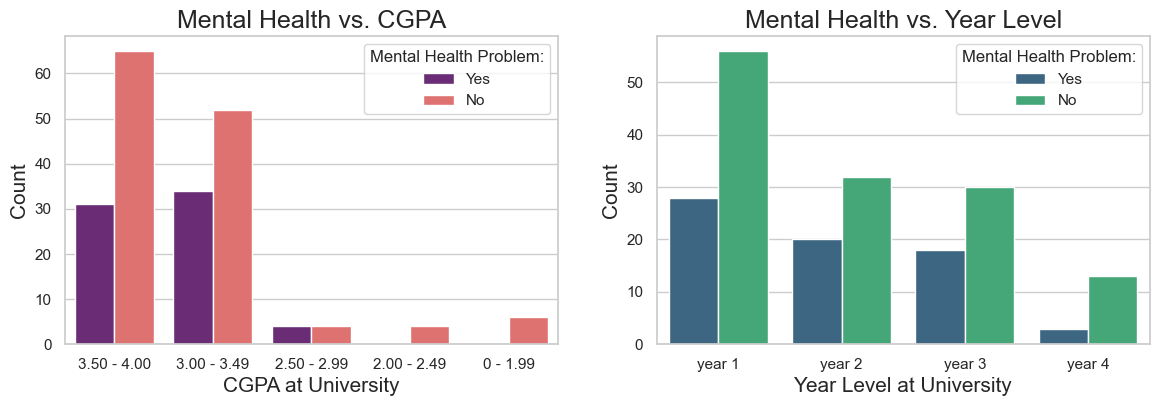

In [ ]:
# Creating a figure with two subplots

figure, academics = plt.subplots(ncols=2, figsize=(14, 4))

sns.set_theme(style="ticks")
sns.countplot(data=melted_dataset_smh, x="What is your CGPA?", hue="Mental Health Problem:", palette='magma', hue_order=['Yes', 'No'], order=['3.50 - 4.00', '3.00 - 3.49', '2.50 - 2.99', '2.00 - 2.49', '0 - 1.99'], ax=academics[0])
academics[0].set_xlabel('CGPA at University', fontsize=15)
academics[0].set_ylabel('Count', fontsize=15)
academics[0].set_title('Mental Health vs. CGPA', fontsize=18)

sns.countplot(data=melted_dataset_smh, x="Your current year of Study", hue="Mental Health Problem:", palette='viridis', hue_order=['Yes', 'No'], ax=academics[1])
academics[1].set_xlabel('Year Level at University', fontsize=15)
academics[1].set_ylabel('Count', fontsize=15)
academics[1].set_title('Mental Health vs. Year Level', fontsize=18)

#exporting the plot to images folder:
plt.savefig('../images/analysis3graph6.png', bbox_inches="tight")

#showing the plot:
plt.show()

The left countplot shows the ratio of people saying they do or do not have a mental health problem (either depression or anxiety) with varying cumulative grade point average (CGPA) ranges. It can be seen that the students with the highest CGPA have the lowest ratio of having mental health problems vs. not having problems- almost twice as many students said they don't have depression as those who said they do have depression. The students with the second highest range of CGPA, 3.00-3.49, have a higher ratio, meaning that a higher proportion of students claimed to have a mental health problems. For the third range of CGPA of 2.50-2.99, although the sample size was small, the ratio is even higher; an equal number of students reported having mental health probelms vs not having them. For the last two, lowest CGPA ranges, the only responses were "No", perhaps because these students simply do not care enough about academics to be mentally bothered by low grades; we can exclude these two ranges from our conclusion. So, overall, the trend is that **as CGPA decreased, a higher ratio of students tended to state that they had mental health problems**.  

The right countplot represents the ratio of having a mental health problem vs. not having it to be the lowest in Years 1 and 4, much higher in Year 2, and similar to Year 2 in Year 3, **meaning that students are most depressed in Years 2 and 3**. This may be due to the higher, more difficult workload that tends to emerge at this point of university.

These learnings supplement the conclusion from Q.1 (that younger populations experience worse mental health problems), by providing external reasons as to why the mental health of younger folks (who are more likely students) might be worse relative to their older counterparts.

### Overall conclusions:


There is a positive correlation between daily music listening and mental health conditions- this correlation is stronger for three of the mental health conditions: depression, insomnia, and OCD.

There is a negative correlation between age and mental health conditions- this correlation is stronger for three of the mental health conditions: anxiety, depression, and OCD. Two of the external factors that contribute to younger populations having worse mental health are both academic: a lower cumulative GPA, and being in Years 2 and 3 of university. 

Lastly, it was found that Spotify and Apple Music users are likely to have higher levels of depression and Pandora users are likely to have lower levels of depression, compared to all other streaming services users; in contrast, for anxiety, insomnia, and OCD, the severity of each mental health condition was generally similar in all users regardless of which streaming service was used. 

*Overall, it may be concluded that from this analysis that younger individuals who listen to a lot of music every day, are in Year 2 or 3 of university, have a low CGPA, and are Spotify or Apple Music users likely experience the worst mental health of all, whereas, older individuals who listen to minimal music in a day and are Pandora users experience the best mental health of all.*
